In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
# Robustly determine the project root directory
# SCRIPT_DIR = os.path.dirname(os.path.abspath(__file__))

SCRIPT_DIR = os.getcwd()

PROJECT_ROOT = os.path.dirname(SCRIPT_DIR)
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
PLOTS_DIR = os.path.join(SCRIPT_DIR, 'plots')
COINMETRICS_PATH = os.path.join(DATA_DIR, 'Coin Metrics', 'coinmetrics_btc.csv')
POLYMARKET_DIR = os.path.join(DATA_DIR, 'Polymarket')

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

# --- Data Loading ---
def load_bitcoin_data(filepath):
    print(f"Loading Bitcoin data from {filepath}...")
    try:
        df = pd.read_csv(filepath)
        df['time'] = pd.to_datetime(df['time'])
        return df
    except Exception as e:
        print(f"Error loading Bitcoin data: {e}")
        return None

def load_polymarket_data(datadir):
    print(f"Loading Polymarket data from {datadir}...")
    markets_path = os.path.join(datadir, 'finance_politics_markets.parquet')
    odds_path = os.path.join(datadir, 'finance_politics_odds_history.parquet')
    summary_path = os.path.join(datadir, 'finance_politics_summary.parquet')
    
    data = {}
    try:
        if os.path.exists(markets_path):
            markets_df = pd.read_parquet(markets_path)
            # Convert date columns
            if 'created_at' in markets_df.columns:
                markets_df['created_at'] = pd.to_datetime(markets_df['created_at'])
            if 'end_date' in markets_df.columns:
                markets_df['end_date'] = pd.to_datetime(markets_df['end_date'])
            data['markets'] = markets_df
            print(f"Loaded {len(markets_df)} markets.")
            
        if os.path.exists(odds_path):
            data['odds'] = pd.read_parquet(odds_path)
            print(f"Loaded {len(data['odds'])} odds history records.")
            
        if os.path.exists(summary_path):
            data['summary'] = pd.read_parquet(summary_path)
            print(f"Loaded {len(data['summary'])} summary records.")
            
        return data if data else None
    except Exception as e:
        print(f"Error loading Polymarket data: {e}")
        return None

In [43]:
# LOAD DATASETS

btc_df = load_bitcoin_data(COINMETRICS_PATH)
if btc_df is not None:
    print("BTC Data Valid.")
poly_data = load_polymarket_data(POLYMARKET_DIR)
if poly_data is not None:
    print("Polymarket Data Valid.")

    print(poly_data.keys())

Loading Bitcoin data from c:\Users\16jac\Repositories\bitcoin-analytics-capstone-template\data\Coin Metrics\coinmetrics_btc.csv...
BTC Data Valid.
Loading Polymarket data from c:\Users\16jac\Repositories\bitcoin-analytics-capstone-template\data\Polymarket...
Loaded 78321 markets.
Loaded 2143181 odds history records.
Loaded 78321 summary records.
Polymarket Data Valid.
dict_keys(['markets', 'odds', 'summary'])


In [48]:
# BTC data analysis
print("------- BTC Data Overview -------")
print(btc_df.columns)
print(btc_df.tail())
print(min(btc_df['time']), max(btc_df['time']))


------- BTC Data Overview -------
Index(['time', 'AdrActCnt', 'AdrBalCnt', 'AssetCompletionTime',
       'AssetEODCompletionTime', 'BlkCnt', 'CapMVRVCur', 'CapMrktCurUSD',
       'CapMrktEstUSD', 'FeeTotNtv', 'FlowInExNtv', 'FlowInExUSD',
       'FlowOutExNtv', 'FlowOutExUSD', 'HashRate', 'IssTotNtv', 'IssTotUSD',
       'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'ReferenceRate',
       'ReferenceRateETH', 'ReferenceRateEUR', 'ReferenceRateUSD', 'SplyCur',
       'SplyExNtv', 'SplyExUSD', 'SplyExpFut10yr', 'TxCnt', 'TxTfrCnt',
       'volume_reported_spot_usd_1d', '200_day_MA'],
      dtype='object')
           time  AdrActCnt   AdrBalCnt  AssetCompletionTime  \
6216 2026-01-10   608784.0  55908713.0         1.768101e+09   
6217 2026-01-11   536405.0  55924280.0         1.768187e+09   
6218 2026-01-12   638422.0  55917951.0         1.768275e+09   
6219 2026-01-13   701272.0  55891967.0         1.768360e+09   
6220 2026-01-14        NaN         NaN                  NaN   

      AssetE

In [49]:
# POLYMARKET data analysis

print(poly_data.keys())

print(poly_data['summary'].columns)
print(poly_data['summary'].tail())

print(min(poly_data['summary']['last_trade']), max(poly_data['summary']['last_trade']))


dict_keys(['markets', 'odds', 'summary'])
Index(['market_id', 'question', 'slug', 'volume', 'active', 'token_count',
       'trade_count', 'first_trade', 'last_trade'],
      dtype='object')
      market_id                                           question  \
78316    224954  Will it be possible to buy a Tesla online in t...   
78317    628727                   Solana Up or Down on October 11?   
78318    680295  Bitcoin Up or Down - November 14, 7:45AM-8:00A...   
78319    692193           Bitcoin Up or Down - November 21, 5PM ET   
78320    611773  Will the price of Solana be above $202 on Sept...   

                                                    slug        volume  \
78316  will-it-be-possible-to-buy-a-tesla-online-usin...  45525.310000   
78317                    solana-up-or-down-on-october-11  29968.744483   
78318                          btc-updown-15m-1763124300  23572.535982   
78319              bitcoin-up-or-down-november-21-5pm-et  46542.760549   
78320             

In [56]:
print("------------------------- MARKET DATA -------------------------")
print(poly_data['markets'].columns)

question_data = poly_data['markets']['question'].head(5)
dates_data = poly_data['markets']['created_at'].head(5)
for q, d in zip(question_data, dates_data):
    print(d, q)

print(min(poly_data['markets']['created_at']), max(poly_data['markets']['created_at']))
print(type(min(poly_data['markets']['created_at'])))

print("------------------------- ODDS DATA -------------------------")
print(poly_data['odds'].columns)
print(poly_data['odds'].tail(5))

print(min(poly_data['odds']['timestamp']), max(poly_data['odds']['timestamp']))

------------------------- MARKET DATA -------------------------
Index(['market_id', 'question', 'slug', 'event_slug', 'category', 'volume',
       'active', 'closed', 'created_at', 'end_date'],
      dtype='object')
2022-04-05 20:37:30 Will Bongbong Marcos be elected President of the Philippines in 2022?
2022-04-05 22:41:57 Will Sarah Palin win Alaska's special election for the U.S. House?
2022-04-05 23:33:47 Will US student loan payments resume by Election Day, 2022?
2022-04-12 16:51:10 Will $ETH be above $3,000 on April 20, 2022?
2022-04-13 01:40:25 Will Brian Kemp win the Republican nomination for the 2022 Georgia gubernatorial race?
2020-10-02 16:10:01 2025-12-10 05:32:21
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
------------------------- ODDS DATA -------------------------
Index(['market_id', 'token_id', 'timestamp', 'price'], dtype='object')
        market_id                                           token_id  \
2143176    897329  1441341842174471672181235644969822857103

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


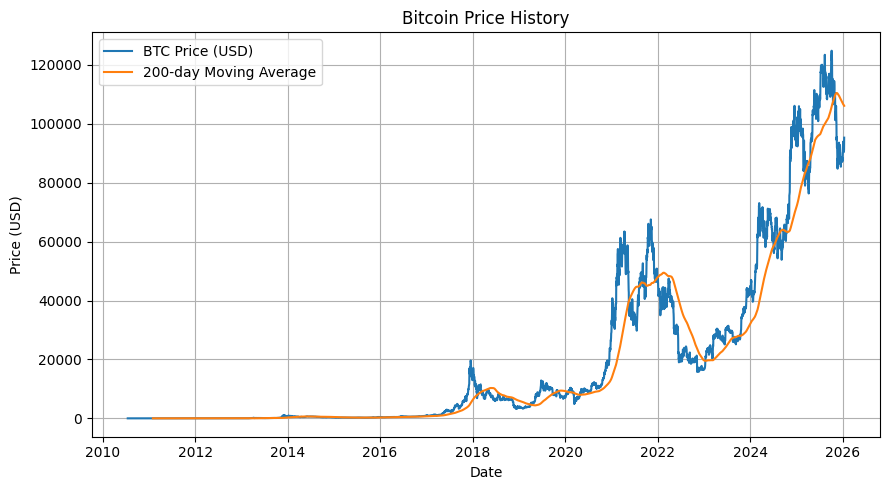

In [57]:
# BTC DATA ANALYSIS

btc_df['200_day_MA'] = btc_df['PriceUSD'].rolling(window=200).mean()
print(type(btc_df['time'].iloc[0]))

plt.figure(figsize=(9, 5))
plt.plot(btc_df['time'], btc_df['PriceUSD'], label='BTC Price (USD)')
plt.plot(btc_df['time'], btc_df['200_day_MA'], label='200-day Moving Average')
plt.title('Bitcoin Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig(os.path.join(PLOTS_DIR, 'btc_price_history.png'))
# print("Saved btc_price_history.png")
# plt.close()
plt.show()